<a href="https://colab.research.google.com/github/MahaswetaTalik/DEEP_LEARNING/blob/main/Keras_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Keras functional API is a way to create models that are more flexible than the Sequential API. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

The main idea is that a deep learning model is usually a directed acyclic graph (DAG) of layers. So the functional API is a way to build graphs of layers. **bold text**


In [7]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam

# 1. Define input
input_shape = (3,)  # Replace with your actual number of features
inputs = Input(shape=input_shape)

# 2. Shared layers
x = Dense(128, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)

# 3. Branch 1 - e.g., classification output
output1 = Dense(32, activation='relu')(x)
output1 = Dense(1, activation='sigmoid', name='classification')(output1)

# 4. Branch 2 - e.g., regression output
output2 = Dense(32, activation='relu')(x)
output2 = Dense(1, activation='linear', name='regression')(output2)

# 5. Build the model
model = Model(inputs=inputs, outputs=[output1, output2])

# 6. Compile the model
model.compile(
    optimizer=Adam(),
    loss={'classification': 'binary_crossentropy', 'regression': 'mse'},
    metrics={'classification': 'accuracy', 'regression': 'mae'}
)

In [8]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │        512 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      8,256 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 32)        │      2,080 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 32)        │      2,080 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classification      │ (None, 1)         │         33 │ dense_6[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ regression (Dense)  │ (None, 1)         │         33 │ dense_7[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 12,994 (50.76 KB)

 Trainable params: 12,994 (50.76 KB)

 Non-trainable params: 0 (0.00 B)

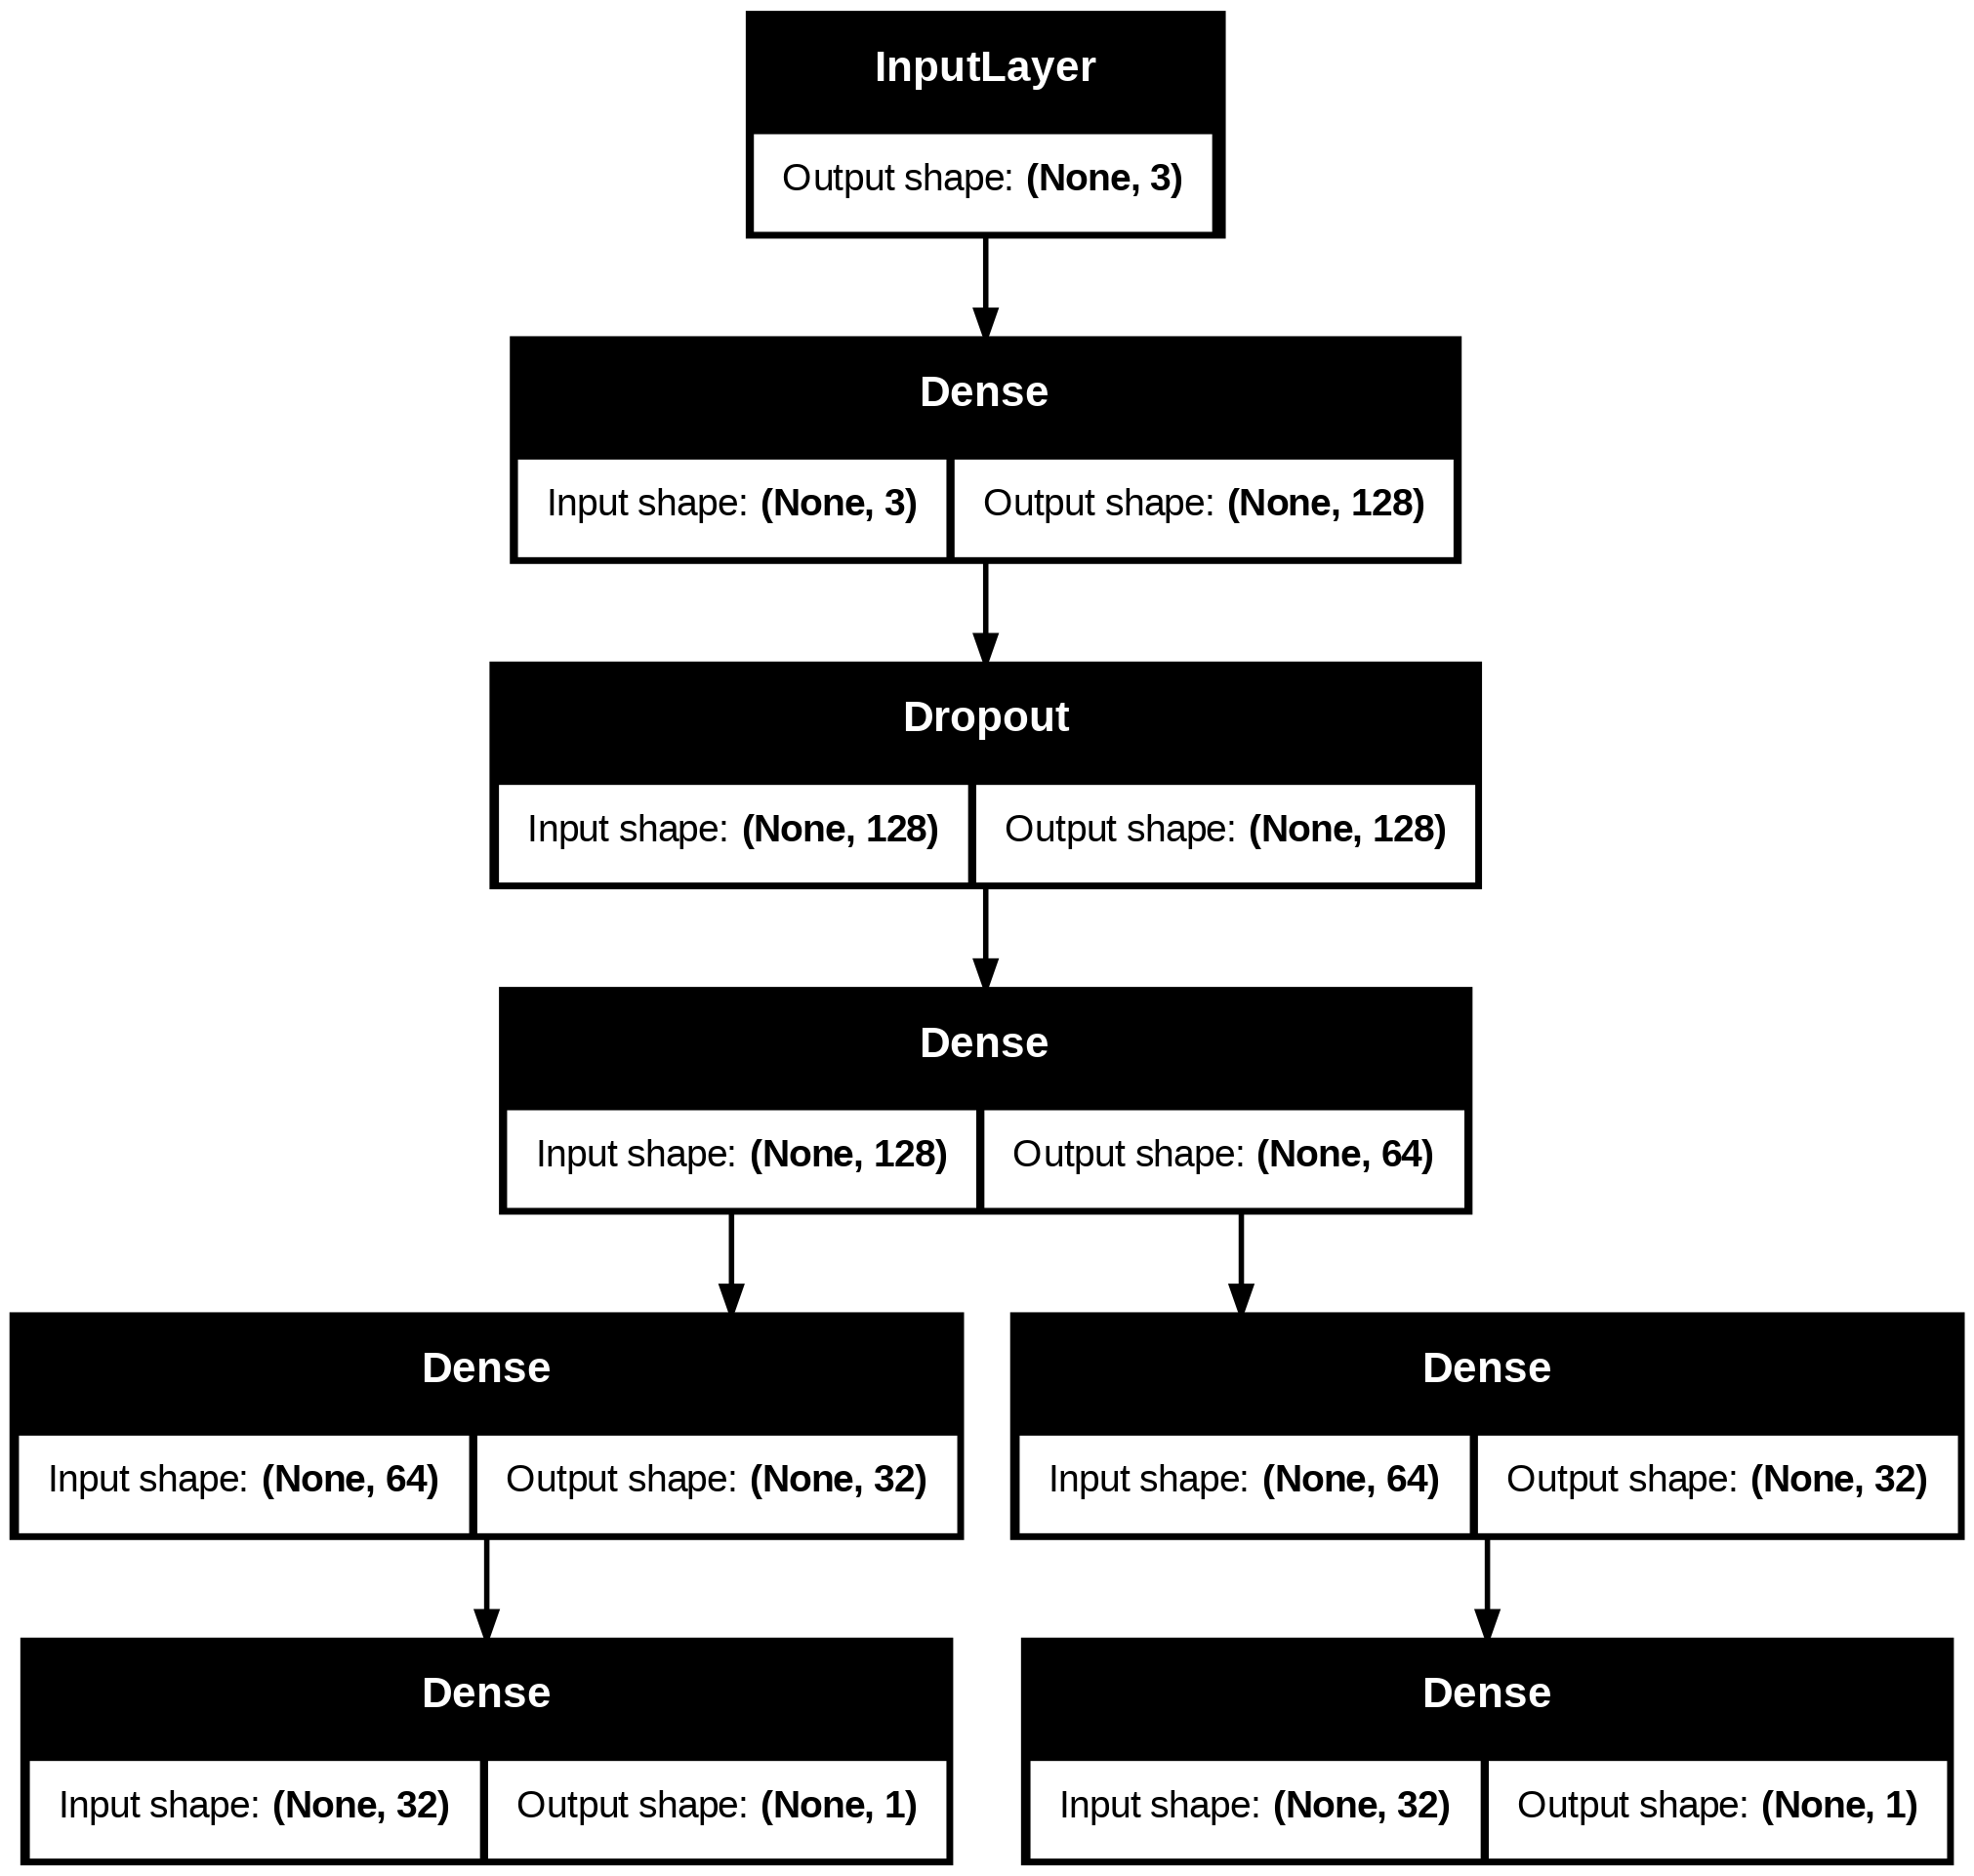

In [9]:
from keras.utils import plot_model

plot_model(model,show_shapes=True)

In [11]:
from keras.models import Model
from keras.layers import Input, Dense, Concatenate, Dropout
from keras.optimizers import Adam

# Define Inputs
input_1 = Input(shape=(64,), name='numerical_input')
input_2 = Input(shape=(10,), name='categorical_input')

# Subnetwork for input_1
x1 = Dense(64, activation='relu')(input_1)
x1 = Dropout(0.3)(x1)

# Subnetwork for input_2
x2 = Dense(32, activation='relu')(input_2)
x2 = Dropout(0.3)(x2)

# Merge both paths
merged = Concatenate()([x1, x2])
merged = Dense(64, activation='relu')(merged)
merged = Dropout(0.3)(merged)

# Final output layer: this is the FIXED line!
output = Dense(1, activation='sigmoid', name='output')(merged)  # Note the parentheses!

# Build and compile the model
model = Model(inputs=[input_1, input_2], outputs=output)

model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [12]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ numerical_input     │ (None, 64)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ categorical_input   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 64)        │      4,160 │ numerical_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 32)        │        352 │ categorical_inpu… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 64)        │          0 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 32)        │          0 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 96)        │          0 │ dropout_5[0][0],  │
│ (Concatenate)       │                   │            │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 64)        │      6,208 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 64)        │          0 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         65 │ dropout_7[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 10,785 (42.13 KB)

 Trainable params: 10,785 (42.13 KB)

 Non-trainable params: 0 (0.00 B)

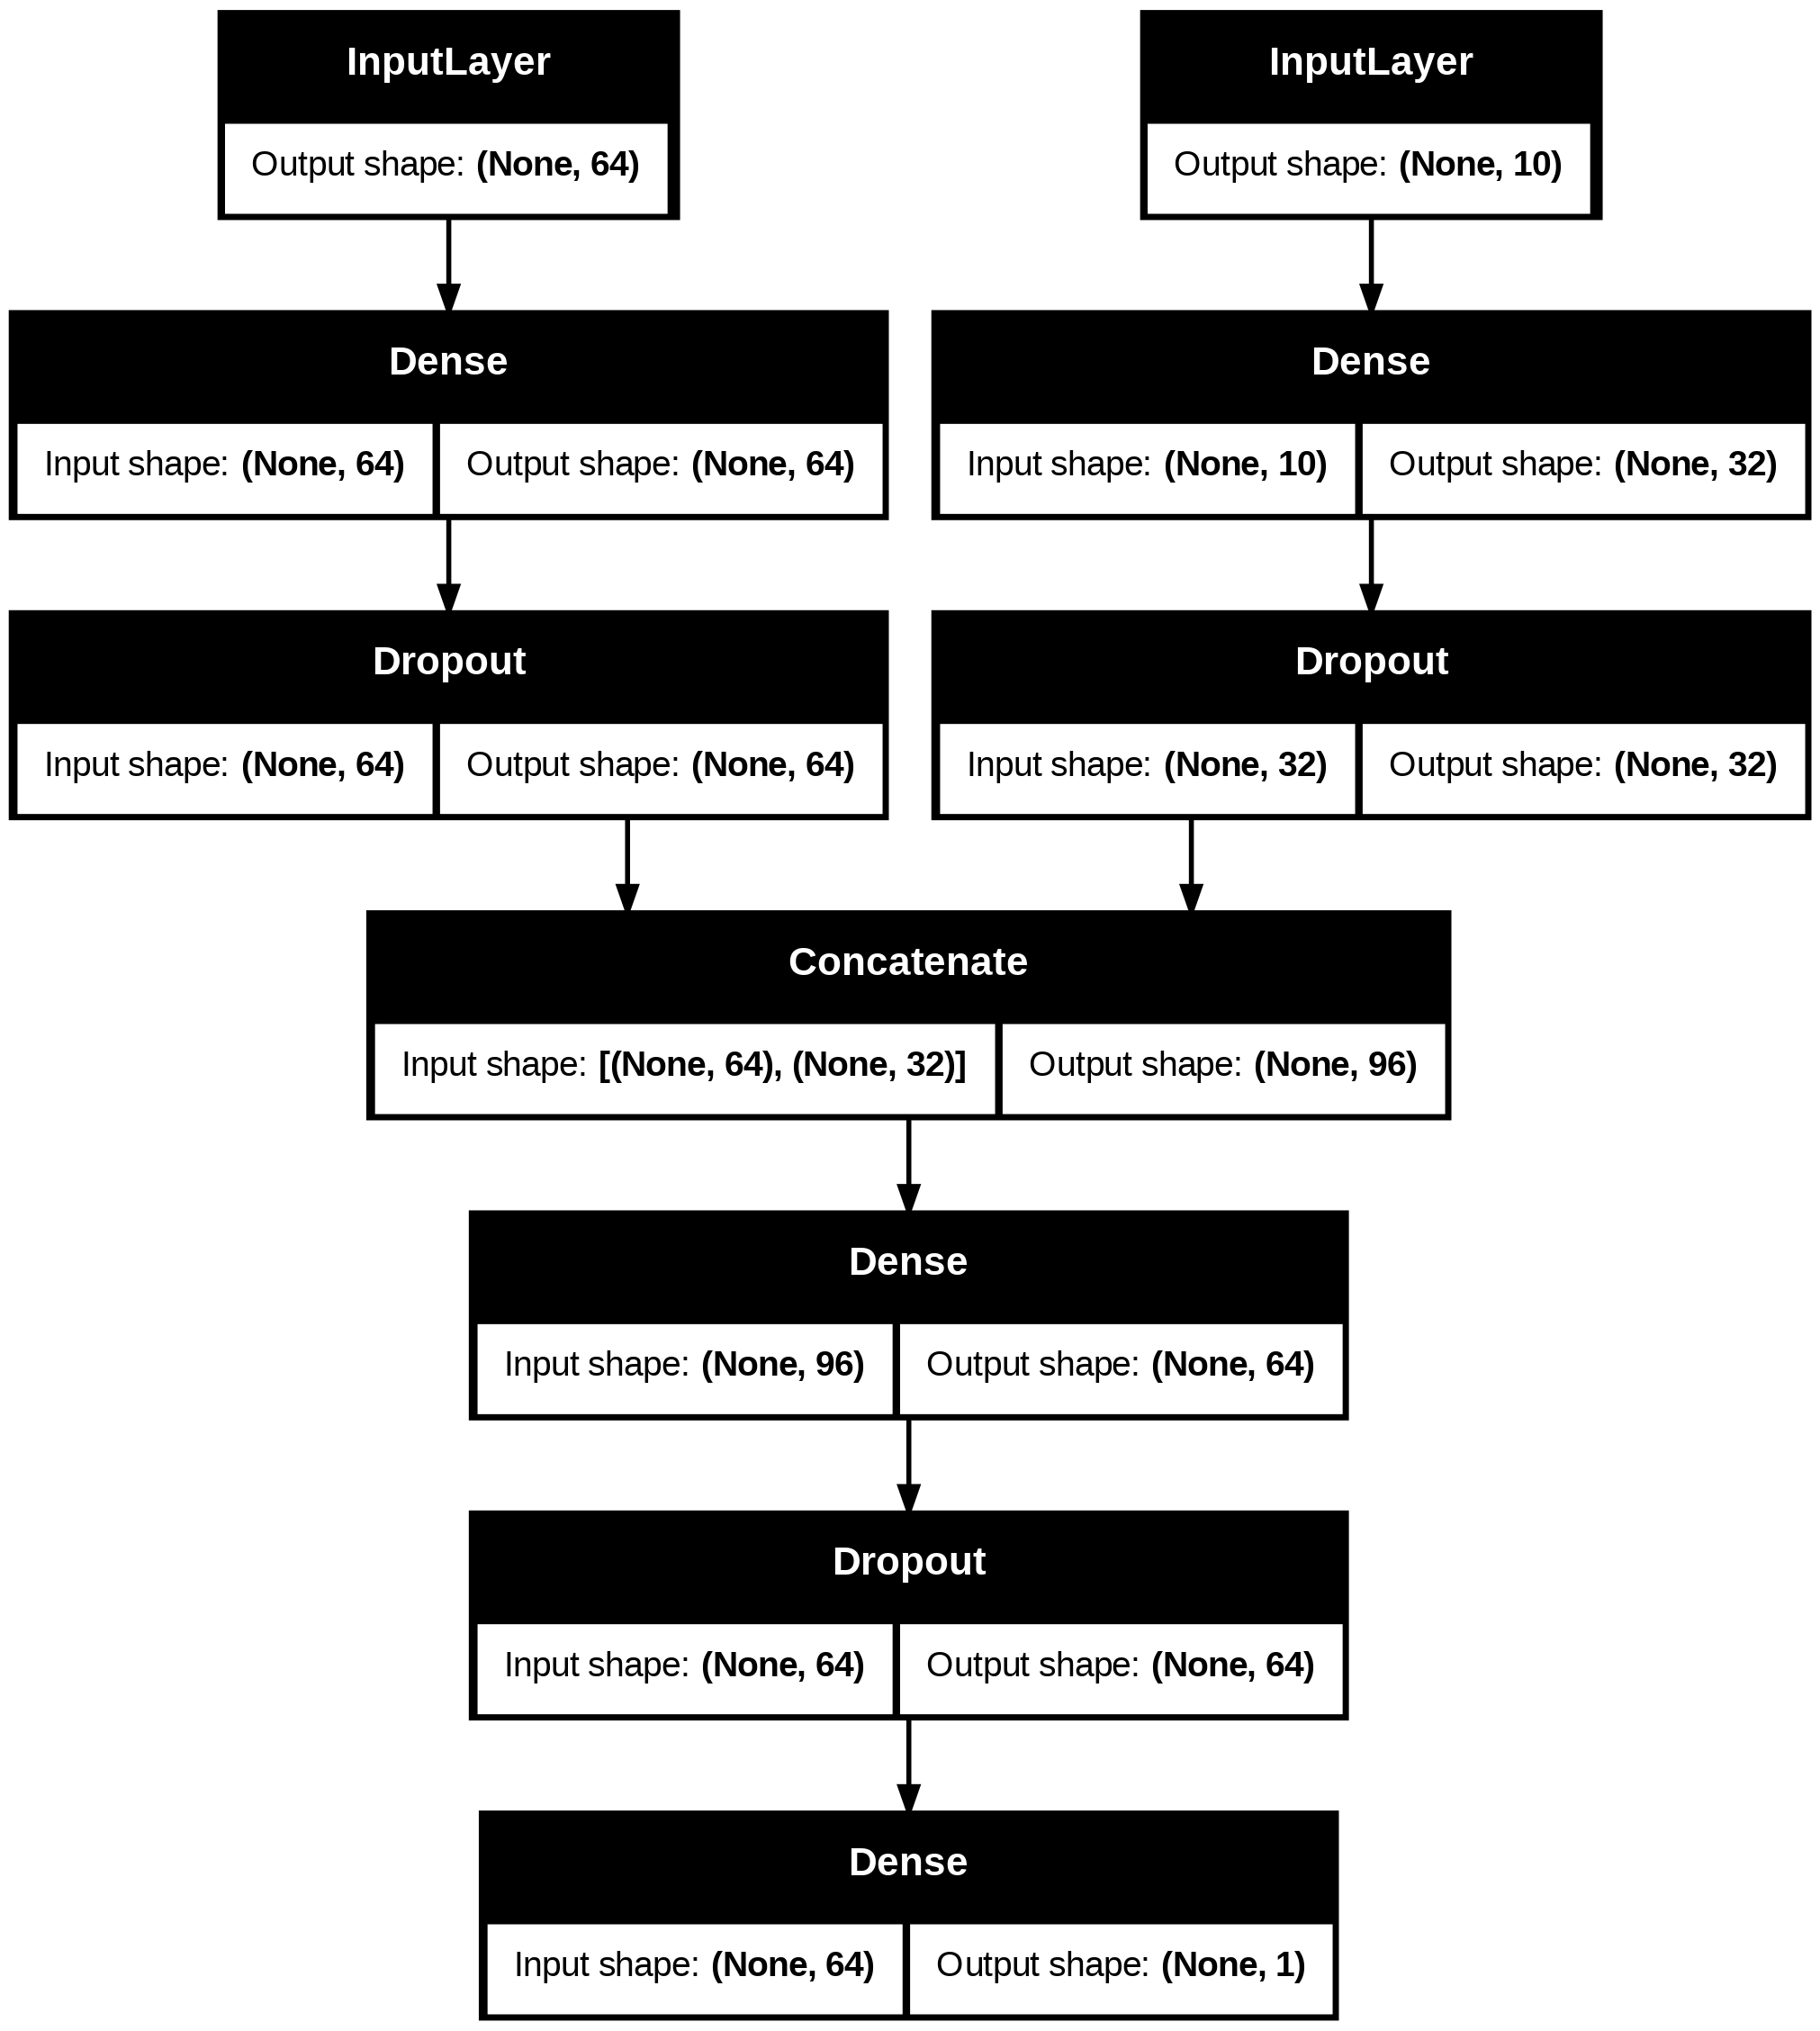

In [13]:
from keras.utils import plot_model

plot_model(model,show_shapes=True)